  <div align="center">
                <font color="#21618C" size=7px>
                    <b> Walmart - Machine Learning Regression Model <br>
                    </b>
                </font>
             </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b> 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                   
                    <b> 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                   
                    <b>
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>Decoding Retail Trends: Sales Prediction for Walmart.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Author : Roopali Sudra

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Problem Statement
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Walmart, a leading retail giant, is interested in optimizing its operations and improving sales forecasting for its various stores. Accurate sales predictions are crucial for effective inventory management, staff planning, and overall business strategy. The company has provided a dataset containing information about weekly sales along with several environmental and economic factors.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Objective
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


The goal of this project is to build a predictive model that can accurately estimate the weekly sales for Walmart stores based on historical data and relevant features. By developing a reliable model, Walmart aims to enhance its ability to forecast sales, allowing for better decision-making and resource allocation.


<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Importing necessary libraries
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [206]:
# import os
import os

# import numpy
import numpy as np

# import pandas
import pandas as pd

# import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

# import seaborn library
import seaborn as sns

#importing stats
import statistics as stat

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'stats' package from scipy library
from scipy import stats

#importing train test split
from sklearn.model_selection import train_test_split, GridSearchCV

#import Linear Regression of stats library
import statsmodels.api as sm

# import scaling libraries
from sklearn.preprocessing import StandardScaler

# import Linear Regression model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR

# import Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# import Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# import Ada Boost Regressor model
from sklearn.ensemble import AdaBoostRegressor

# import Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

import datetime
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.5px>                   
                    <b>  Data Description
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


1. **Store:** This column represents the unique identifier for each store.

2. **Date:** Indicates the date of the recorded data.

3. **Weekly_Sales:** This column represents the total sales for the specified store on the given date.

4. **Holiday_Flag:** A binary indicator (0 or 1) that denotes whether the week contains a holiday. 1 indicates a holiday week, and 0 indicates a non-holiday week.

5. **Temperature:** Represents the average temperature on the given date.

6. **Fuel_Price:** The cost of fuel on the specified date.

7. **CPI (Consumer Price Index):** A measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. It is an economic indicator that reflects inflation.

8. **Unemployment:** Represents the unemployment rate on the given date.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.5px>                   
                    <b> Table of Content
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

1. **[BASIC INFORMATION ABOUT DATASET](#msv)**
2. **[ DATA PREPRATION](#hmsv)**
3. **[EXPLORATORY DATA ANALYSIS](#out)**
4. **[SCALING THE NUMERICAL COLUMNS ](#odt)**
5. **[ENCODING CATEGORICAL COLUMN](#split)**
6. **[BASIC MODEL BUILDING](#fe)**
7. **[MODEL OPTIMIZATION](#fel)**

#### GETTING DATA

In [155]:
data = pd.read_csv('Walmart.csv')

In [156]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Based on the project objectives, all the columns in the dataset seem to have relevance and contribute to the predictive model. Hence, there are no identified redundant columns in the dataset.

<a id="msv"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                        <b>  BASIC INFORMATION ABOUT DATASET
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                        <b> Getting the shape of the dataset that is number of rows and columns
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [157]:
print('Number of Rows: ',data.shape[0])
print('Number of Columns: ',data.shape[1])

Number of Rows:  6435
Number of Columns:  8


<a id="msv"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                        <b> Getting info of the dataset 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<a id="msv"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                        <b> Checking For Null values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
nullvalues = data.isna().sum()
nullvalues

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There are no null  values present in our dataset. 

<a id="msv"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                        <b> Checking For any Duplicates present in dataset
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
data.duplicated().sum()

0

#### Data does not have any duplicates!

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=3px>                   
                        <b> Transforming the Date column
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
data.Date=pd.to_datetime(data.Date,format = "%d-%m-%Y")

data['day'] = data.Date.dt.day
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

#0 for Monday, 1 for Tuesday, ..., 6 for Sunday

In [162]:
data.drop(['Date'], axis=1, inplace=True)

In [163]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


`Store` represents different store locations identified by numbers from 1 to 45, then it is a categorical variable. This is because the numbers are used as labels for the stores and do not have a mathematical meaning.  

In [164]:
data['Store'] = data['Store'].astype('object')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   day           6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(1), object(1)
memory usage: 427.4+ KB


In [168]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


<a id="out"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  EXPLORATORY DATA ANALYSIS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Why is EDA so important in data science?

* The main purpose of EDA is to help you look at the data before making any assumptions. In addition to better understanding the patterns in the data or detecting unusual events, it also helps you find interesting relationships between variables.

* Data scientists can use exploratory analysis to ensure that the results they produce are valid and relevant to desired business outcomes and goals.

* EDA also helps stakeholders by verifying that they are asking the right questions. 

* EDA can help to answer questions about standard deviations, categorical variables, and confidence intervals.

<a id="out"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b> CHECKING DISTRIBUTION OF THE TARGET VARIABLE
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

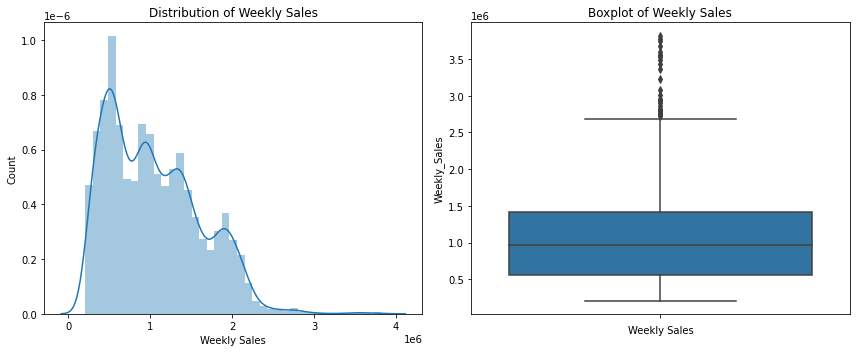

In [172]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "Weekly_Sales" column
sns.distplot(data['Weekly_Sales'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Weekly Sales")
axes[0].set_xlabel("Weekly Sales")
axes[0].set_ylabel("Count")

# Boxplot plot for the "Weekly Sales" column
sns.boxplot(data=data, y='Weekly_Sales',ax=axes[1])
axes[1].set_title("Boxplot of Weekly Sales")
axes[1].set_xlabel("Weekly Sales")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

The distribution is positively skewed.
There are few outliers observed on the upper side of the central distribution.

<a id="out"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b> NORMALIZING THE TARGET VARIABLE
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
data['Weekly_Sales'] = np.log(data['Weekly_Sales'])
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,14.312455,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,14.311400,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,14.292966,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,14.158907,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,14.256862,0,46.50,2.625,211.350143,8.106,5,3,2010


<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                        <b> Linear Relationship between Target and other columns
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [174]:
data.corr()['Weekly_Sales']

Store          -0.294786
Weekly_Sales    1.000000
Holiday_Flag    0.026770
Temperature    -0.092519
Fuel_Price      0.018771
CPI            -0.077481
Unemployment   -0.079817
day            -0.022206
month           0.053042
year           -0.007854
Name: Weekly_Sales, dtype: float64

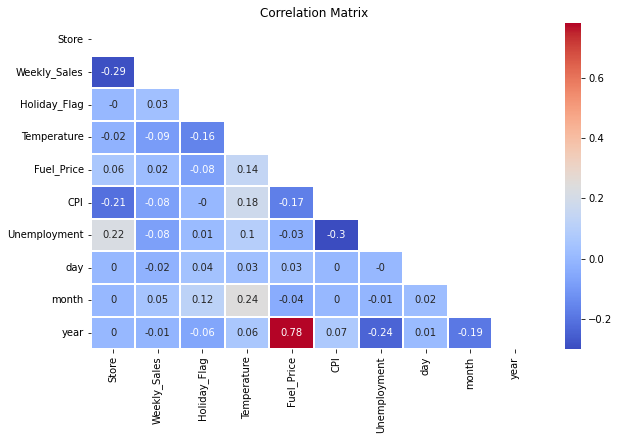

In [175]:
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(round(data.corr(), 2), annot=True, linewidths=2, cmap='coolwarm', mask=mask)

plt.title('Correlation Matrix')
plt.show()

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>Detection Of Outliers through boxplots
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

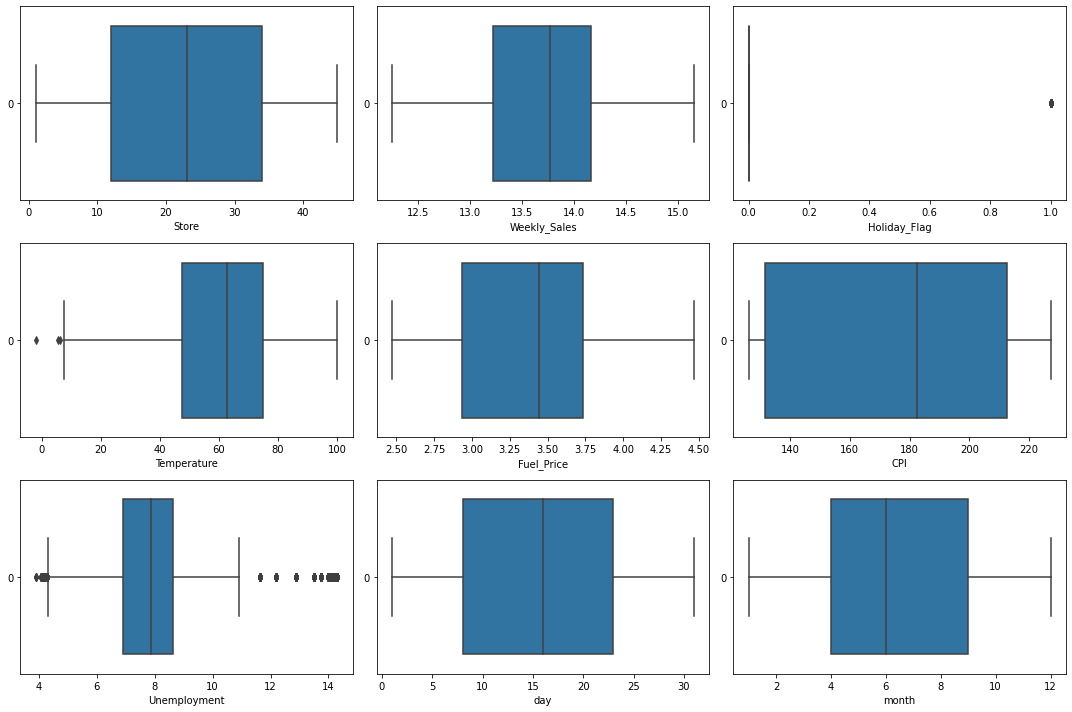

In [176]:
# Detection Of Outliers in datasets 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, j in zip(data.columns, ax.flatten()):
    sns.boxplot(data[i], ax=j, orient='h')  # Set orient to 'h' for horizontal boxplots
    j.set_xlabel(i)  # Set x-label
    j.set_ylabel("")  # Remove y-label to save space
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

the concept of outliers doesn't apply to `Holiday Flag` column as in the case of a binary variable, there are only two possible values, and each value is a legitimate and expected part of the dataset and for the `Year` column there are no unexpected values. Outliers are observations that significantly deviate from the typical range of values in a dataset, and this notion is more relevant for continuous data.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b> Distribution of numeric columns
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

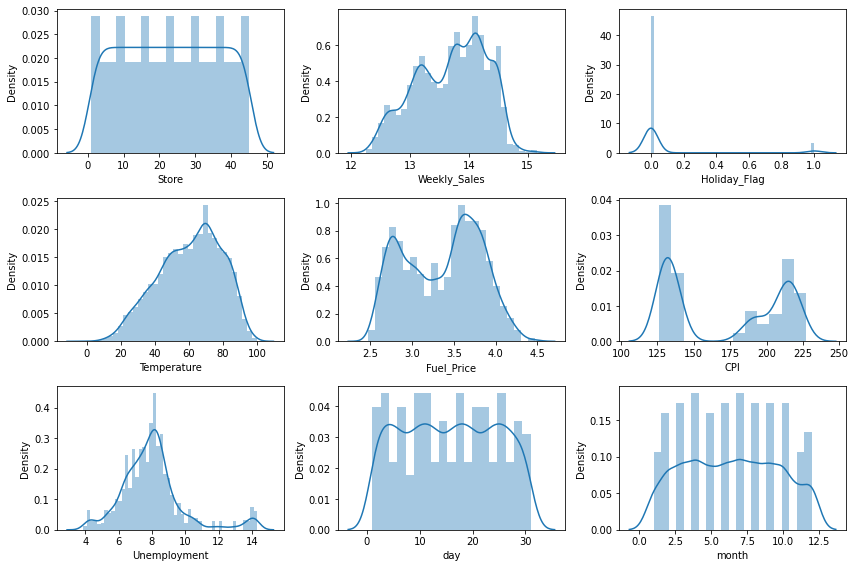

In [177]:
fig, ax = plt.subplots(3,3, figsize=(12,8))

for var,subplot in zip(data.columns, ax.flatten()):
    sns.distplot(data[var], ax=subplot)
    
plt.tight_layout()
plt.show()

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b> Treatment of outliers
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [178]:
data2 = data.copy()

In [180]:
data2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,14.312455,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,14.311400,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,14.292966,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,14.158907,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,14.256862,0,46.50,2.625,211.350143,8.106,5,3,2010


In [181]:
# Assuming df is your DataFrame
# Define a function for capping based on IQR
def cap_outliers_iqr(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Set your desired multiplier for IQR
iqr_multiplier = 1.5

# Apply capping to 'Unemployment' using IQR
data2['Unemployment'] = cap_outliers_iqr(data['Unemployment'], multiplier=iqr_multiplier)

# Apply capping to 'Temperature' using IQR
data2['Temperature'] = cap_outliers_iqr(data['Temperature'], multiplier=iqr_multiplier)

# Now, your DataFrame 'df' has capped values for 'Weekly_Sales', 'Unemployment', and 'Temperature' based on IQR

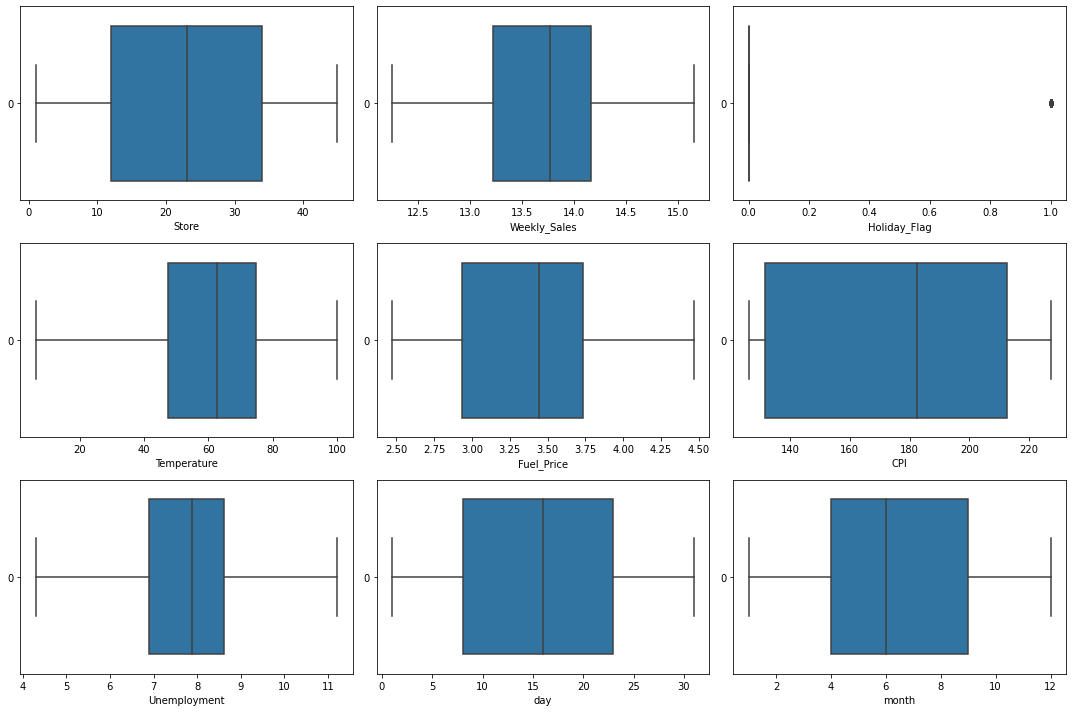

In [182]:
# Detection Of Outliers in datasets 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, j in zip(data2.columns, ax.flatten()):
    sns.boxplot(data2[i], ax=j, orient='h')  # Set orient to 'h' for horizontal boxplots
    j.set_xlabel(i)  # Set x-label
    j.set_ylabel("")  # Remove y-label to save space
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b> Scatterplot between target and independent numeric variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

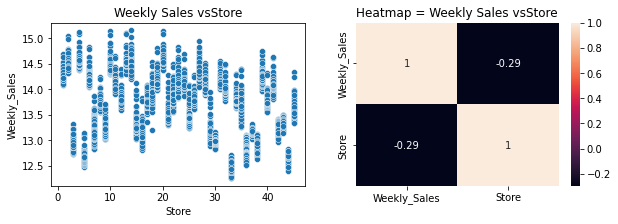

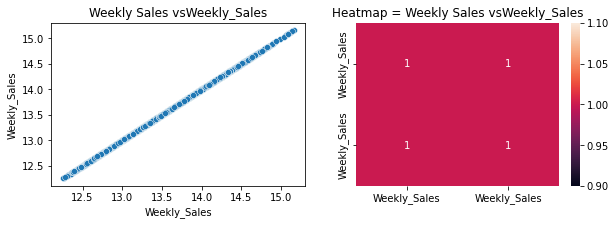

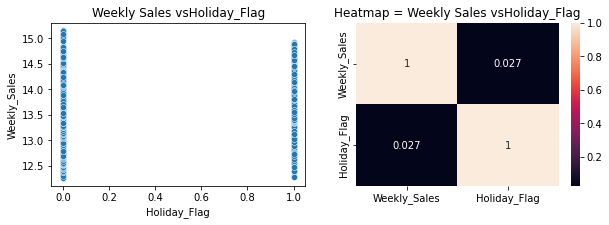

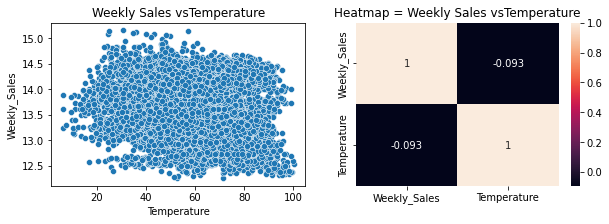

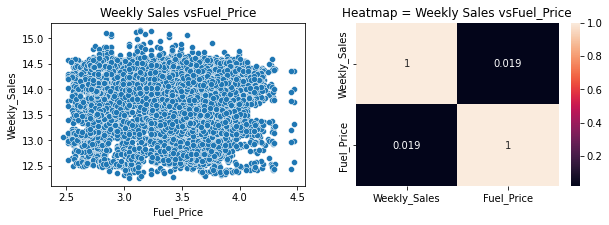

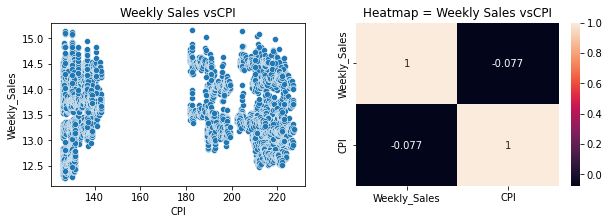

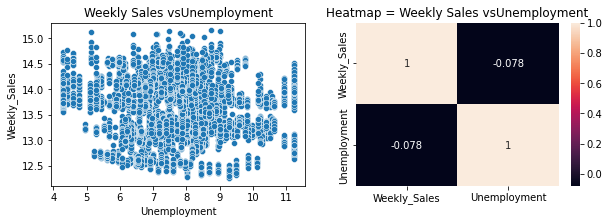

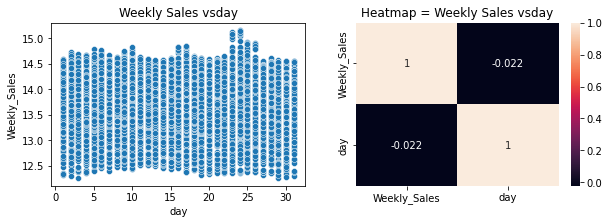

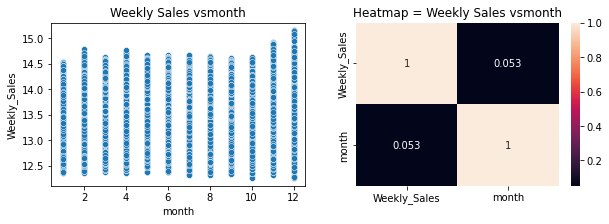

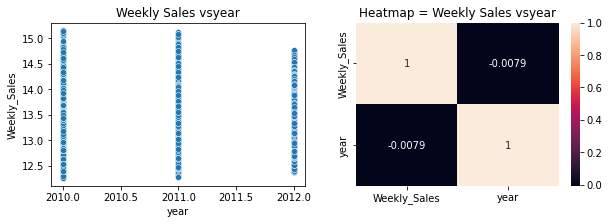

In [183]:
for col in data2.columns:
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    
    #scatterplot using seaborn
    sns.scatterplot(x=data2[col], y=data2['Weekly_Sales'], ax=axes[0])
    axes[0].set_title('Weekly Sales vs' + col)
    axes[0].set_xlabel(col)
    axes[0].set_label('Weekly Sales')
    
    #heatmap using seaborn
    sns.heatmap(data2[['Weekly_Sales',col]].corr(), annot=True, ax = axes[1])
    plt.title('Heatmap = Weekly Sales vs' + col)
    
    plt.show()

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b> Creating a pairplot
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [184]:
data2.to_csv('eda_data.csv', index=False)

<a id="odt"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b> DATA PREPROCESSING FOR MODEL BUILDING
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="odt"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  SCALING THE NUMERICAL COLUMNS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

- **Normalization of Data:** Scaling brings all numerical features within a common range, typically between 0 and 1.
- **Improved Convergence:** Scaling helps algorithms converge faster during the training process.
- **Equivalence of Units:** Scaling makes features with different units comparable in importance.
- **Distance-Based Algorithms:** Scaling ensures distance-based algorithms work accurately.
- **Regularization Techniques:** Some regularization methods assume all features have the same scale.
- **Gradient Descent:** Scaling helps gradient descent converge faster and more accurately.
- **Model Interpretability:** Scaling preserves the significance and direction of feature effects on the target.

In [185]:
data = pd.read_csv('eda_data.csv')
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,14.312455,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,14.311400,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,14.292966,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,14.158907,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,14.256862,0,46.50,2.625,211.350143,8.106,5,3,2010


In [186]:
#we are not taking target variable while scaling
# List of numerical columns to be scaled
numerical_columns = ['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','day','month','year']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [187]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,14.312455,-0.274204,-0.995450,-1.713800,1.004175,0.15441,-1.219669,-1.373525,-1.210899
1,1,14.311400,3.646917,-1.201534,-1.766089,1.007880,0.15441,-0.420135,-1.373525,-1.210899
2,1,14.292966,-0.274204,-1.124524,-1.840166,1.009074,0.15441,0.379399,-1.373525,-1.210899
3,1,14.158907,-0.274204,-0.761165,-1.737766,1.009849,0.15441,1.178933,-1.373525,-1.210899
4,1,14.256862,-0.274204,-0.768215,-1.598328,1.010624,0.15441,-1.219669,-1.064698,-1.210899


In [188]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
count,6435.000000,6435.000000,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03
mean,23.000000,13.701908,-3.098618e-17,-2.561708e-16,-1.077684e-15,-7.596789e-16,1.413356e-16,-7.591269e-19,1.545858e-17,1.136791e-13
std,12.988182,0.588302,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,1.000000,12.254797,-2.742042e-01,-2.951622e+00,-1.931672e+00,-1.156548e+00,-2.352207e+00,-1.676545e+00,-1.682352e+00,-1.210899e+00
25%,12.000000,13.223746,-2.742042e-01,-7.161521e-01,-9.272803e-01,-1.012445e+00,-6.446298e-01,-8.770114e-01,-7.558708e-01,-1.210899e+00
50%,23.000000,13.775465,-2.742042e-01,1.087266e-01,1.882269e-01,2.804854e-01,1.835940e-03,3.674182e-02,-1.382164e-01,4.387315e-02
75%,34.000000,14.166279,-2.742042e-01,7.741612e-01,8.200572e-01,1.046025e+00,4.937549e-01,8.362759e-01,7.882652e-01,1.298645e+00
max,45.000000,15.155417,3.646917e+00,2.140824e+00,2.417063e+00,1.414212e+00,2.201332e+00,1.750029e+00,1.714747e+00,1.298645e+00


<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b> ENCODING CATEGORICAL COLUMNS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [189]:
import category_encoders as ce 
encoder = ce.CatBoostEncoder(cols=["Store"])

In [190]:
data["Store"] = encoder.fit_transform(X=data["Store"],y=data["Weekly_Sales"])

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b> Checking for Distribution of Numerical columns through Skewness 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [194]:
# Check skewness of numerical columns
skewness = data.skew()
skewness

Store          -0.350466
Weekly_Sales   -0.305578
Holiday_Flag    3.373499
Temperature    -0.334958
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    0.183231
day             0.008512
month           0.039568
year            0.062642
dtype: float64

In [195]:
data.to_csv('final_data.csv', index=False)

<a id="fe"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  BASIC MODEL BUILDING 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [196]:
df = pd.read_csv('final_data.csv')

In [197]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,13.701908,14.312455,-0.274204,-0.995450,-1.713800,1.004175,0.15441,-1.219669,-1.373525,-1.210899
1,14.007182,14.311400,3.646917,-1.201534,-1.766089,1.007880,0.15441,-0.420135,-1.373525,-1.210899
2,14.108588,14.292966,-0.274204,-1.124524,-1.840166,1.009074,0.15441,0.379399,-1.373525,-1.210899
3,14.154682,14.158907,-0.274204,-0.761165,-1.737766,1.009849,0.15441,1.178933,-1.373525,-1.210899
4,14.155527,14.256862,-0.274204,-0.768215,-1.598328,1.010624,0.15441,-1.219669,-1.064698,-1.210899


In [198]:
X = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4504, 9)
(4504,)
(1931, 9)
(1931,)


In [199]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
ridge = Ridge(alpha=5,random_state=100)
lasso = Lasso(alpha=7,random_state=100)
elasticnet = ElasticNet(alpha=2,l1_ratio=0.01,random_state=100)

<a id="fe"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Model Evaluation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [200]:
regression_models = [lr, rfr, gbr, dtr, abr,ridge, lasso, elasticnet]
score_train = []
score_test = []

for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train, y_train))
    score_test.append(model.score(X_test, y_test))

model_names = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Decision Tree Regressor', 'AdaBoostRegressor', 'ridge', 'lasso', 'elasticnet']

scores = pd.DataFrame({'Model': model_names, 'Training Score (R^2)': score_train, 'Testing Score (R^2)': score_test})
scores

,Model,Training Score (R^2),Testing Score (R^2)
0,Linear Regression,0.951881,0.948013
1,Random Forest Regressor,0.995533,0.975207
2,Gradient Boosting Regressor,0.976202,0.970863
3,Decision Tree Regressor,0.998463,0.960727
4,AdaBoostRegressor,0.944456,0.938572
5,ridge,0.951869,0.948020
6,lasso,0.000000,-0.001328
7,elasticnet,0.231409,0.229440


<a id="fe"> </a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Finding the best parameters and Hypertuning
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [204]:
def tune_and_evaluate(model,param_grid):
    
    '''This function recieves a model then tune it using GridSearch 
    then print the best parameters and return the best estimator'''
    
    # tunning the model
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,scoring='r2')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    print('-------------------------------------------------------------------')
    
    # best estimator evaluation
    print("Training set Accuracy:",round(best_estimator.score(X_train,y_train),3)*100)
    print("Test set Accuracy:",round(best_estimator.score(X_test,y_test),3)*100)
    
    return best_estimator

In [207]:
# building the model
lin_reg = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
)

# hyperparameter tunning
param_grid = {'polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg,param_grid)

Best parameters are:  {'polynomialfeatures__degree': 4}
Mean cross-validated score of the best_estimator is:  0.9708759578686589
-------------------------------------------------------------------
Training set Accuracy: 98.3
Test set Accuracy: 97.1


In [208]:
# building the model
dec_tree = DecisionTreeRegressor()

# hyperparameter tunning
param_grid = {'max_depth': np.arange(2,13)}
dec_tree = tune_and_evaluate(dec_tree,param_grid)

Best parameters are:  {'max_depth': 9}
Mean cross-validated score of the best_estimator is:  0.9626359542152662
-------------------------------------------------------------------
Training set Accuracy: 98.5
Test set Accuracy: 96.7


In [209]:
# building the model
random_forest = RandomForestRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,15),
    'n_estimators': np.arange(25,101,25)
}
random_forest = tune_and_evaluate(random_forest,param_grid)

Best parameters are:  {'max_depth': 14, 'n_estimators': 100}
Mean cross-validated score of the best_estimator is:  0.9731897341217547
-------------------------------------------------------------------
Training set Accuracy: 99.5
Test set Accuracy: 97.6


**All three models show high accuracy on both the training and test sets, suggesting good performance. However, the Random Forest model has the highest test set accuracy (97.6%), indicating that it might be the best-performing model among the three. In conclusion, based on the provided accuracy results, the Random Forest model appears to be the best choice.**